#📌 Extracción

In [24]:
import pandas as pd

In [25]:
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [26]:
import json

In [27]:
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

    df_normalizado = pd.json_normalize(data)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [28]:
df_normalizado.columns.to_list()
print(df_normalizado.columns.to_list())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [74]:
nvas_columnas = {'customerID':'ID',
                 'Churn':'Abandonó',
                 'customer.gender':'Género',
                 'customer.SeniorCitizen':'=>65 Años',
                 'customer.Partner':'Pareja',
                 'customer.Dependents':'Dependientes',
                 'customer.tenure':'Meses de Contrato',
                 'phone.PhoneService':'sus_serv_tel',
                 'phone.MultipleLines':'+ de 1_lin_tel',
                 'internet.InternetService':'sus_provee_inter',
                 'internet.OnlineSecurity':'Seguridad_linea',
                 'internet.OnlineBackup':'Respaldo_linea',
                 'internet.DeviceProtection':'Protección_dispositivo',
                 'internet.TechSupport':'Soporte_en_espera',
                 'internet.StreamingTV':'TV_Cable',
                 'internet.StreamingMovies':'Sus_películas',
                 'account.Contract':'Tipo_contrato',
                 'account.PaperlessBilling':'Factura_online',
                 'account.PaymentMethod':'Forma_Pago',
                 'account.Charges.Monthly':'Total_serv_x_mes',
                 'account.Charges.Total':'Total_gastado'}

df_renombrado = df_normalizado.rename(columns=nvas_columnas)
df_renombrado.head()

,ID,Abandonó,Género,=>65 Años,Pareja,Dependientes,Meses de Contrato,sus_serv_tel,+ de 1_lin_tel,sus_provee_inter,...,Respaldo_linea,Protección_dispositivo,Soporte_en_espera,TV_Cable,Sus_películas,Tipo_contrato,Factura_online,Forma_Pago,Total_serv_x_mes,Total_gastado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [77]:
df_renombrado['Abandonó'].unique()

array(['No', 'Yes', ''], dtype=object)

In [52]:
df_renombrado['Abandonó'] = (
    df_renombrado['Abandonó']
    .str.strip()
    .replace('', pd.NA)
)

In [54]:
df_renombrado = df_renombrado.dropna(subset=['Abandonó'])
df_renombrado['Abandonó'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df_renombrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7267 non-null   object 
 1   Abandonó                7267 non-null   object 
 2   Género                  7267 non-null   object 
 3   =>65 Años               7267 non-null   int64  
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Meses de Contrato       7267 non-null   int64  
 7   sus_serv_tel            7267 non-null   object 
 8   + de 1_lin_tel          7267 non-null   object 
 9   sus_provee_inter        7267 non-null   object 
 10  Seguridad_linea         7267 non-null   object 
 11  Respaldo_linea          7267 non-null   object 
 12  Protección_dispositivo  7267 non-null   object 
 13  Soporte_en_espera       7267 non-null   object 
 14  TV_Cable                7267 non-null   

In [78]:
#CONVERTIR OBJET A FLOAT 64 EL TOTAL DE GASTOS
df_renombrado['Total_gastado'] = pd.to_numeric(
    df_renombrado['Total_gastado'],
    errors='coerce'
)


In [79]:
df_renombrado['Total_gastado'].dtype

dtype('float64')

In [31]:
df_renombrado.dtypes

,0
ID,object
Abandonó,object
Género,object
=>65 Años,int64
Pareja,object
Dependientes,object
Meses de Contrato,int64
sus_serv_tel,object
+ de 1_lin_tel,object
sus_provee_inter,object


#📊 Carga y análisis

In [44]:
#TIPOS DE PROVEEDORES DE INTERNET
tipo_de_internet = df_renombrado['sus_provee_inter'].value_counts()
tipo_de_internet

,count
sus_provee_inter,
Fiber optic,3198
DSL,2488
No,1581


In [55]:
#CANTIDAD DE ABANDONOS
cant_abandono = df_renombrado['Abandonó'].value_counts()
cant_abandono

,count
Abandonó,
No,5174
Yes,1869


In [59]:
#ABANDONO SEGÚN TIPO DE INTERNET
pd.crosstab(
    df_renombrado['sus_provee_inter'],
    df_renombrado['Abandonó']
)

Abandonó,,No,Yes
sus_provee_inter,,,
DSL,67,1962,459
Fiber optic,102,1799,1297
No,55,1413,113


In [62]:
df_renombrado['Género'].value_counts()

,count
Género,
Male,3675
Female,3592


In [64]:
#EL SABER QUE GÉNERO ABANDONÓ MAS O NO, NO ES RELEVANTE.
df_renombrado[df_renombrado['Abandonó'] == 'Yes']['Género'].value_counts()

,count
Género,
Female,939
Male,930


In [65]:
#verifico si existen ID duplicados.
df_renombrado['ID'].duplicated().any()

np.False_

In [68]:
#CLIENTES QUE ABANDONARON(RELACIONADO CON LA CNATIDAD DE MESES DE CONTRATO)
df_renombrado[df_renombrado['Abandonó'] == 'Yes']['Meses de Contrato'].agg(
    minimo='min',
    maximo='max',
    promedio='mean'
).round(1)

,Meses de Contrato
minimo,1.0
maximo,72.0
promedio,18.0


In [69]:
#CLIENTES QUE NO ABANDONARON(RELACIONADO CON LA CNATIDAD DE MESES DE CONTRATO)
df_renombrado[df_renombrado['Abandonó'] == 'No']['Meses de Contrato'].agg(
    minimo='min',
    maximo='max',
    promedio='mean'
).round(1)

,Meses de Contrato
minimo,0.0
maximo,72.0
promedio,37.6


In [70]:
df_renombrado['Tipo_contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [71]:
# ABANDONO SEGUN TIPO DE CONTRATO
pd.crosstab(
    df_renombrado['Tipo_contrato'],
    df_renombrado['Abandonó']
)


Abandonó,,No,Yes
Tipo_contrato,,,
Month-to-month,130,2220,1655
One year,46,1307,166
Two year,48,1647,48


In [72]:
#CLIENTES CON POERSONAS A CARGO O NO
df_renombrado['Dependientes'].value_counts()

,count
Dependientes,
No,5086
Yes,2181


In [73]:
# COMPARO DEPENDIENTES Y ABANDONOS
pd.crosstab(
    df_renombrado['Dependientes'],
    df_renombrado['Abandonó']
)


Abandonó,,No,Yes
Dependientes,,,
No,153,3390,1543
Yes,71,1784,326


In [80]:
#COMPARO TOTAL DE GASTOS CON LOS ABANDONOS
df_renombrado.groupby('Abandonó')['Total_gastado'].agg(
    minimo='min',
    maximo='max',
    promedio='mean'
).round(1)


,minimo,maximo,promedio
Abandonó,,,
,18.9,8425.3,2196.9
No,18.8,8672.4,2555.3
Yes,18.8,8684.8,1531.8


In [81]:
#COMPARACION DE GASTOS "MENSUALES"CON LOS ABANDONOS
df_renombrado.groupby('Abandonó')['Total_serv_x_mes'].agg(
    minimo='min',
    maximo='max',
    promedio='mean'
).round(1)

,minimo,maximo,promedio
Abandonó,,,
,18.8,115.6,63.4
No,18.2,118.8,61.3
Yes,18.8,118.4,74.4


###Aqui voy a verificar el gasto diario de los clientes que abandonaron.

In [88]:
#FILTRO LOS DE MESES CERO DE CONTRATO
filtro = (
    (df_renombrado['Abandonó'] == 'Yes') &
    (df_renombrado['Meses de Contrato'] > 0)
)


In [91]:
#CÁLCULO DE GASTO DIARIO PARA LOS QUE ABANDONAN
cuentas_diarias_abandono = (
    df_renombrado.loc[filtro, 'Total_serv_x_mes']
    / df_renombrado.loc[filtro, 'Meses de Contrato']
)

In [92]:
cuentas_diarias_abandono.agg(
    minimo='min',
    maximo='max',
    promedio='mean'
).round(2)


,0
minimo,0.32
maximo,102.45
promedio,19.11


###Seguidamente Analizo el gasto diario de los que no se han ido.

In [93]:
filtro2 = (
    (df_renombrado['Abandonó'] == 'No') &
    (df_renombrado['Meses de Contrato'] > 0)
)

In [94]:
cuentas_diarias_No_abandono = (
    df_renombrado.loc[filtro2, 'Total_serv_x_mes']
    / df_renombrado.loc[filtro2, 'Meses de Contrato']
)

In [95]:
cuentas_diarias_No_abandono.agg(
    minimo='min',
    maximo='max',
    promedio='mean'
).round(2)

,0
minimo,0.27
maximo,95.85
promedio,4.82


###En el siguiente gráfico podemos ver claramente la causa de porque los clientes abandonan el servicio. Evidentemente por el costo diario.

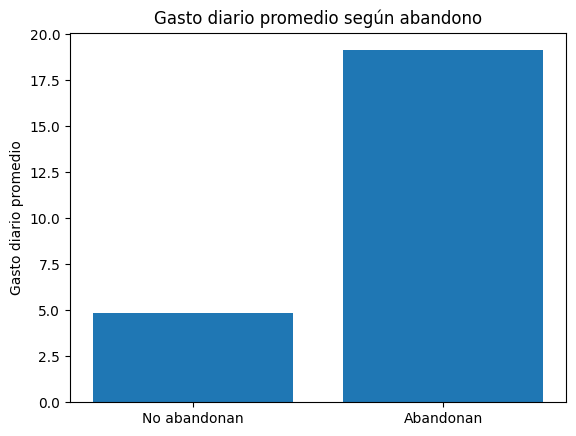

In [109]:
promedios = [
    cuentas_diarias_No_abandono.mean(),
    cuentas_diarias_abandono.mean()
]

plt.figure()
plt.bar(['No abandonan', 'Abandonan'], promedios)
plt.ylabel('Gasto diario promedio')
plt.title('Gasto diario promedio según abandono')
plt.show()


###***Gráfico de Proporción Total de abandonos y permanebcia.***

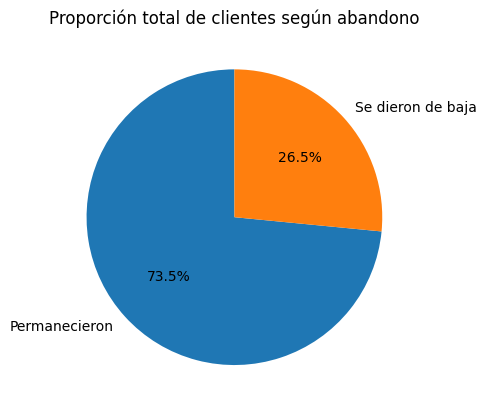

In [111]:
df_prop = df_renombrado[df_renombrado['Abandonó'].isin(['Yes', 'No'])]


import matplotlib.pyplot as plt

conteo = df_prop['Abandonó'].value_counts()

plt.figure()
plt.pie(
    conteo.values,
    labels=['Permanecieron', 'Se dieron de baja'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proporción total de clientes según abandono')
plt.show()


###***Recuento de evasión por variables categóricas***

A partir del análisis gráfico de la evasión de clientes en función de distintas variables categóricas, se identifican patrones relevantes que permiten caracterizar el comportamiento de abandono.

En primer lugar, se observa que la evasión no se distribuye de manera homogénea entre los distintos perfiles de clientes. Determinadas categorías presentan una mayor proporción de abandono, lo que sugiere la existencia de factores asociados a estas características que influyen en la decisión de cancelar el servicio.

En relación con el tipo de contrato, los gráficos muestran una mayor incidencia de abandono en los contratos de corto plazo, especialmente en aquellos de modalidad mensual, mientras que los contratos de mayor duración exhiben tasas de evasión considerablemente menores. Este comportamiento sugiere que la estabilidad contractual actúa como un factor protector frente al abandono.

Respecto del método de pago, se evidencia que ciertos mecanismos presentan una mayor proporción de clientes que abandonan, lo cual podría estar vinculado a niveles más bajos de compromiso o a una menor percepción de valor del servicio.

En cuanto al género, si bien se observan diferencias, estas no resultan marcadamente significativas, lo que indica que esta variable, por sí sola, no constituye un determinante fuerte del abandono, sino que su efecto debe analizarse en conjunto con otras características del cliente.

**Análisis de variables numéricas según evasión**

En esta etapa se analiza la distribución de variables numéricas, tales como el total gastado y el tiempo de contrato, comparando su comportamiento entre los clientes que cancelaron el servicio (evasión) y aquellos que permanecieron activos.

Este análisis permite evaluar si existen diferencias significativas en los niveles de gasto y en la duración de la relación contractual entre ambos grupos, aportando información clave para comprender el impacto de estas variables en la probabilidad de abandono. Asimismo, la comparación de las distribuciones facilita la identificación de patrones económicos y temporales asociados a la evasión, contribuyendo a una interpretación más profunda del comportamiento del cliente.

#📄Informe final

###**Conclusiones**

**Informe Final**

 – Análisis de Evasión de Clientes (Churn)


🔹 **Introducción**

El objetivo de este análisis es estudiar el fenómeno de evasión de clientes (Churn), entendida como la cancelación del servicio por parte de los usuarios. La evasión representa un problema crítico para las empresas, ya que impacta directamente en los ingresos y en la sostenibilidad del negocio.
A través del análisis exploratorio de datos, se busca identificar patrones, perfiles y variables asociadas al abandono, con el fin de generar información que permita diseñar estrategias de retención más efectivas.



🔹 **Limpieza y Tratamiento de Datos**


En primer lugar, se realizó la importación del conjunto de datos y su posterior revisión general. Durante esta etapa se llevaron a cabo las siguientes tareas:

Selección y renombrado de columnas para mejorar la claridad y consistencia del análisis.

Identificación y eliminación de valores nulos o vacíos en variables clave, especialmente en la columna Abandonó.

Conversión de variables numéricas almacenadas como texto (por ejemplo, Total_gastado) al tipo de dato adecuado (float).

Filtrado de registros con valores inválidos, como clientes con cero meses de contrato, para evitar distorsiones en los cálculos.

Creación de métricas derivadas, como el gasto diario, a partir del total gastado y el tiempo de contrato.

Estos pasos permitieron contar con un conjunto de datos consistente, limpio y apto para el análisis exploratorio.



🔹 **Análisis Exploratorio de Datos**

El análisis exploratorio se centró en comparar el comportamiento de los clientes que abandonaron el servicio frente a aquellos que permanecieron activos, utilizando tanto variables categóricas como numéricas.

En términos generales, se observó que el **26,5 %** de los clientes abandonó el servicio, mientras que el **73,5 %** permaneció, lo que indica una tasa de evasión relevante.

El análisis por variables categóricas permitió identificar diferencias en la evasión según:

**Tipo de contrato**

**Tipo de servicio de internet**

**Género y otras características del cliente**


Por otro lado, el análisis de variables numéricas mostró diferencias significativas en:

**Total gastado**

**Duración del contrato**

**Gasto diario promedio**

Los gráficos y visualizaciones facilitaron la identificación de tendencias claras, especialmente en relación con el nivel de gasto y el tipo de servicio contratado.


🔹 **Conclusiones e Insights**

Los resultados obtenidos evidencian que la evasión no ocurre de manera aleatoria, sino que está asociada a factores económicos y contractuales.

Se observó que los clientes que abandonan el servicio presentan:

Un mayor gasto mensual promedio.

Un costo diario significativamente más alto, alcanzando un valor promedio de **19,11**, frente a **4,82** en los clientes que permanecen, lo que representa casi cuatro veces más.

Una mayor concentración en el servicio de fibra óptica, lo que sugiere posibles problemas de percepción de valor o calidad del servicio en relación al precio.

Estos hallazgos indican que el precio relativo y la experiencia del cliente son factores clave en la decisión de abandono.

🔹 **Recomendaciones**

A partir del análisis realizado, se proponen las siguientes recomendaciones estratégicas:

Revisar la estructura de precios, especialmente para clientes con altos costos mensuales y diarios.

Implementar acciones de retención temprana dirigidas a clientes con contratos cortos y altos niveles de gasto.

Evaluar la calidad del servicio de fibra óptica, asegurando que el valor percibido esté alineado con el precio cobrado.

Diseñar campañas de fidelización basadas en segmentación de riesgo, priorizando a los perfiles con mayor probabilidad de evasión.

Monitorear de forma continua las métricas de churn para anticipar comportamientos de abandono.